## 3. EDA and Pre-Processing

### 3.1 Loading libraries & dataset

In [1]:
library("data.table")
library("magrittr")
library("ggplot2")

Loading dataset after cleaning

In [2]:
X_test=fread("https://u2bigdataprojectpredictfrombraina-donotdelete-pr-keui4jukxng1lb.s3.eu.cloud-object-storage.appdomain.cloud/X_test.csv")

Y_train=fread("https://u2bigdataprojectpredictfrombraina-donotdelete-pr-keui4jukxng1lb.s3.eu.cloud-object-storage.appdomain.cloud/y_train.csv")
X_train=fread("https://u2bigdataprojectpredictfrombraina-donotdelete-pr-keui4jukxng1lb.s3.eu.cloud-object-storage.appdomain.cloud/X_train.csv")


Problem index difference from python and R. Python starts with 0 while R at 1. We apply correction. 

In [3]:
X_train$Id = X_train$Id - 1 
X_test$Id = X_test$Id - 1

#### 3.1.2 File structure and content

In [5]:
str(X_train[,1:10])
str(X_test[,1:10])

summary(X_train[,1:10])
summary(X_test[,1:10])

Classes ‘data.table’ and 'data.frame':	264880 obs. of  10 variables:
 $ Id      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Channels: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Segments: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V1      : num  26.98 -7.27 -14.96 36.53 3.05 ...
 $ V2      : num  27.37 -8.1 -15.61 39.97 3.69 ...
 $ V3      : num  26.91 -8.26 -16.58 41.85 3.54 ...
 $ V4      : num  25.64 -7.87 -17.41 41.89 2.94 ...
 $ V5      : num  23.59 -7.27 -16.81 40.12 2.44 ...
 $ V6      : num  20.85 -6.8 -14.5 35.98 2.47 ...
 $ V7      : num  17.68 -6.63 -10.75 29.62 3.16 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	264880 obs. of  10 variables:
 $ Id      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Channels: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Segments: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V1      : num  -9.21 -1.86 -65.86 7.17 -23.96 ...
 $ V2      : num  -8.13 -4.7 -65.21 4.57 -25.74 ...
 $ V3      : num  -7.3 -6.7 -64.43 2.56 -27.32 ...
 $ V4      : num  -7.23 -7.52 -64.03 1.4 -29

       Id           Channels    Segments           V1           
 Min.   :  0.0   Min.   :1   Min.   : 1.00   Min.   :-130900.2  
 1st Qu.:236.0   1st Qu.:2   1st Qu.:10.75   1st Qu.:    -13.4  
 Median :472.5   Median :4   Median :20.50   Median :      0.1  
 Mean   :472.5   Mean   :4   Mean   :20.50   Mean   :     14.5  
 3rd Qu.:709.0   3rd Qu.:6   3rd Qu.:30.25   3rd Qu.:     13.9  
 Max.   :945.0   Max.   :7   Max.   :40.00   Max.   : 378593.7  
       V2                  V3                  V4           
 Min.   :-129878.3   Min.   :-128803.3   Min.   :-127349.4  
 1st Qu.:    -13.4   1st Qu.:    -13.4   1st Qu.:    -13.4  
 Median :      0.1   Median :      0.1   Median :      0.1  
 Mean   :     14.1   Mean   :     13.7   Mean   :     12.9  
 3rd Qu.:     13.9   3rd Qu.:     13.9   3rd Qu.:     13.8  
 Max.   : 377198.7   Max.   : 375743.8   Max.   : 374236.0  
       V5                  V6                  V7           
 Min.   :-125680.3   Min.   :-151201.0   Min.   :-228081.

       Id           Channels    Segments           V1            
 Min.   :  0.0   Min.   :1   Min.   : 1.00   Min.   :-179875.41  
 1st Qu.:236.0   1st Qu.:2   1st Qu.:10.75   1st Qu.:    -13.67  
 Median :472.5   Median :4   Median :20.50   Median :      0.16  
 Mean   :472.5   Mean   :4   Mean   :20.50   Mean   :      1.18  
 3rd Qu.:709.0   3rd Qu.:6   3rd Qu.:30.25   3rd Qu.:     13.93  
 Max.   :945.0   Max.   :7   Max.   :40.00   Max.   : 179878.58  
       V2                   V3                   V4            
 Min.   :-179047.06   Min.   :-178182.97   Min.   :-177285.72  
 1st Qu.:    -13.65   1st Qu.:    -13.59   1st Qu.:    -13.59  
 Median :      0.15   Median :      0.12   Median :      0.10  
 Mean   :      1.15   Mean   :      1.19   Mean   :      1.29  
 3rd Qu.:     13.89   3rd Qu.:     13.87   3rd Qu.:     13.85  
 Max.   : 179050.84   Max.   : 178187.58   Max.   : 177291.16  
       V5                   V6                   V7            
 Min.   :-176372.50   Min.

We find : 
- We have 3 qualitative data and 500 quantitative data (observation)
- High Max and Min in each observation :We will have to deal with
outliers

#### 3.1.3 Missing values

No missing values


#### 3.1.4 Convertion into right format


In [4]:
X_test$Id<- as.factor(X_test$Id)
X_test$Channels<- as.factor(X_test$Channels)
X_test$Segments<- as.factor(X_test$Segments)
X_train$Id<- as.factor(X_train$Id)
X_train$Channels<- as.factor(X_train$Channels)
X_train$Segments<- as.factor(X_train$Segments)


Y_train$id<-as.factor(Y_train$id)
Y_train$label<-as.factor(Y_train$label)


#### 3.1.5 Create train dataset merged


In [5]:
train=merge(X_train,Y_train, by.x = 'Id', by.y ='id',all=TRUE,no.dups=TRUE)

## 3.2 EDA

### 3.2.1 Intro : First plots

https://www.youtube.com/watch?v=iWo90uxkNM0   
Plot 1 st obsrvation for all ID, coulour by channels, regroup by Segments

=> to show the distribution of the channel per segment. 

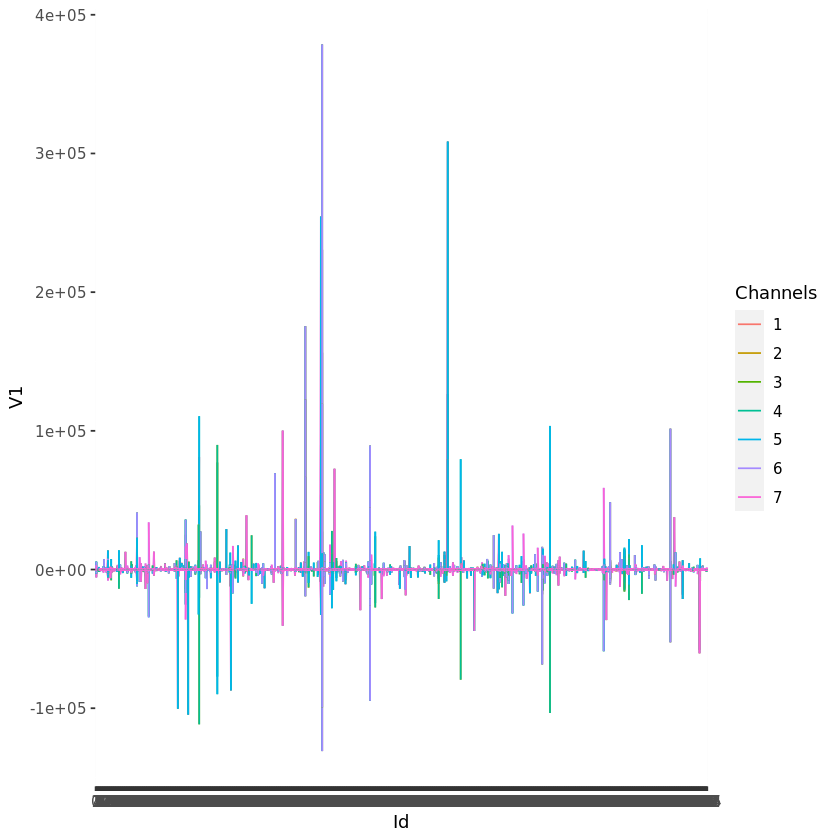

In [8]:
p1 <- ggplot(X_train[1:264880,c(1,4,2,3)],aes(x=Id,y=V1,colour=Channels))
p1 + geom_line(group=X_train$Segments)

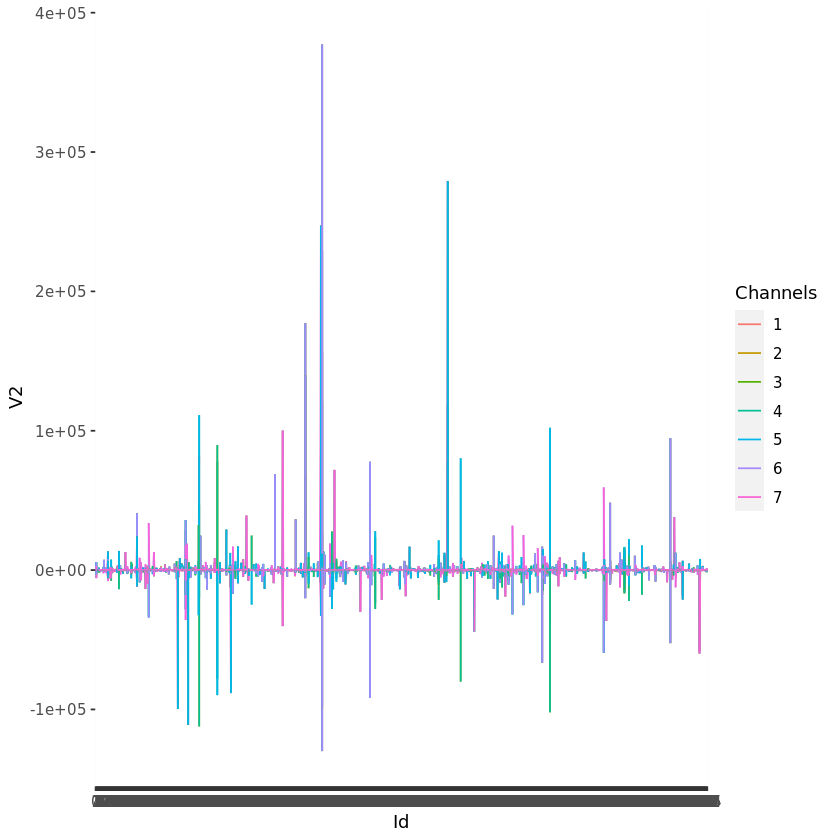

In [9]:
p1 <- ggplot(X_train[1:264880,c(1,5,2,3)],aes(x=Id,y=V2,colour=Channels))
p1 + geom_line(group=X_train$Segments)

We retrive the name of the obs columns (row 3 to 503)

In [8]:
Obs = colnames(train[,-c(1:3,504)])


In [11]:
PlotDT = data.table::melt(train, id.vars = c(1,2,3,504), 
          measure.vars = Obs, 
          variable.name = "Obs",
          value.name = "Value")

All ID 1st Channel, 1 st segment

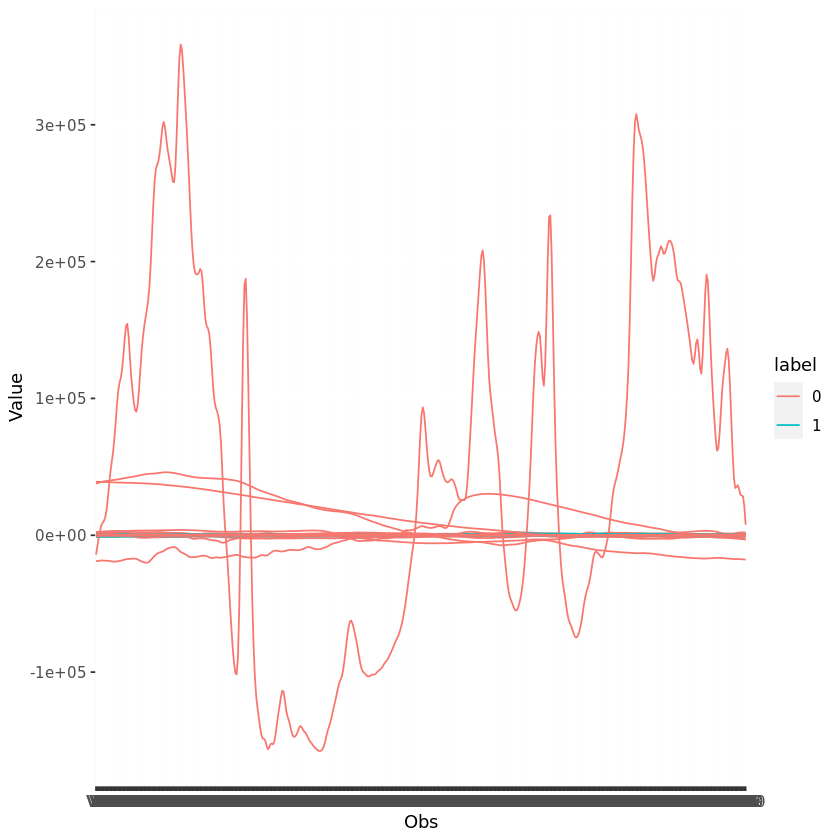

In [13]:

Selectedid = c("1","2","3","4","5","6","7")
PlotDT[Channels=="1"& Segments=="1"] %>% 
   ggplot(aes(x = Obs, y = Value, group=Id)) +
   geom_line(aes(colour = `label`))


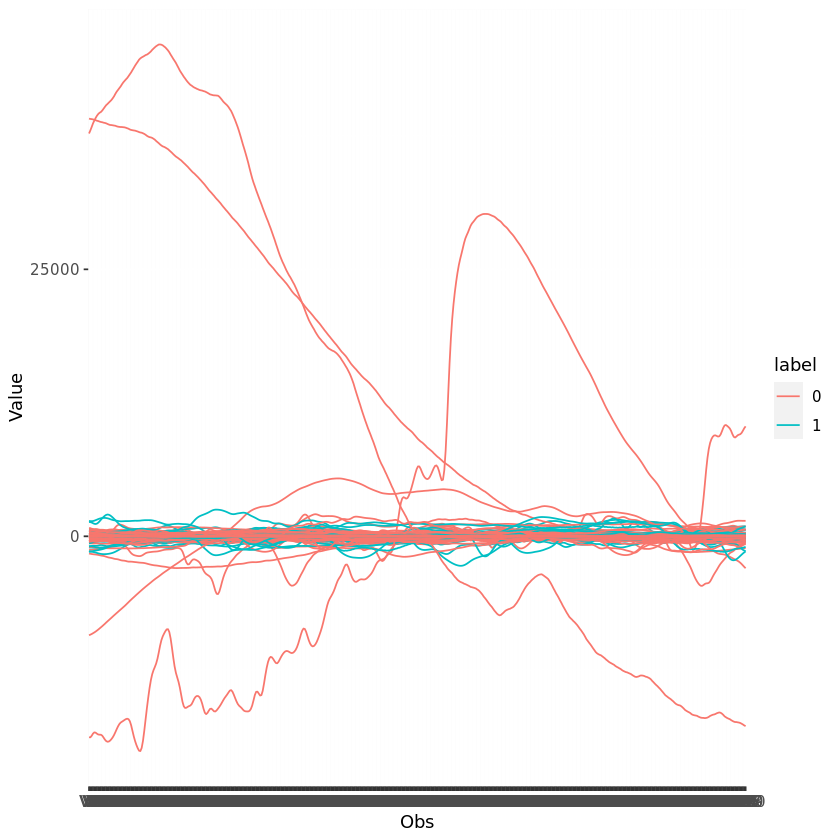

In [14]:
PlotDT[Channels=="2"& Segments=="1"] %>% 
   ggplot(aes(x = Obs, y = Value, group=Id)) +
   geom_line(aes(colour = `label`))

=> We have outliers

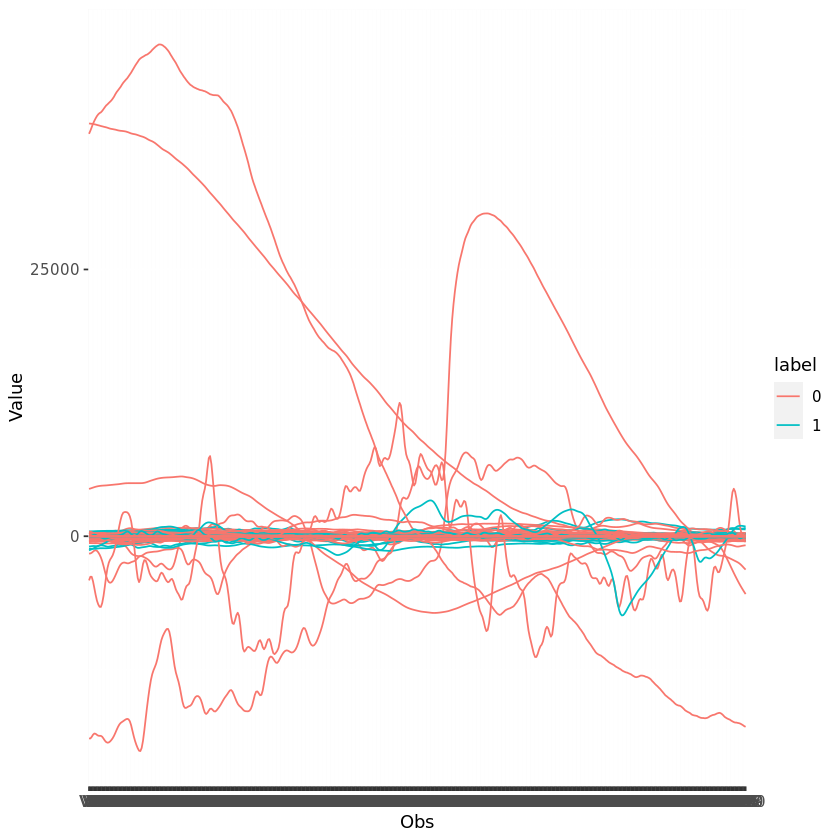

In [15]:
PlotDT[Channels=="3"& Segments=="1"] %>% 
   ggplot(aes(x = Obs, y = Value, group=Id)) +
   geom_line(aes(colour = `label`))

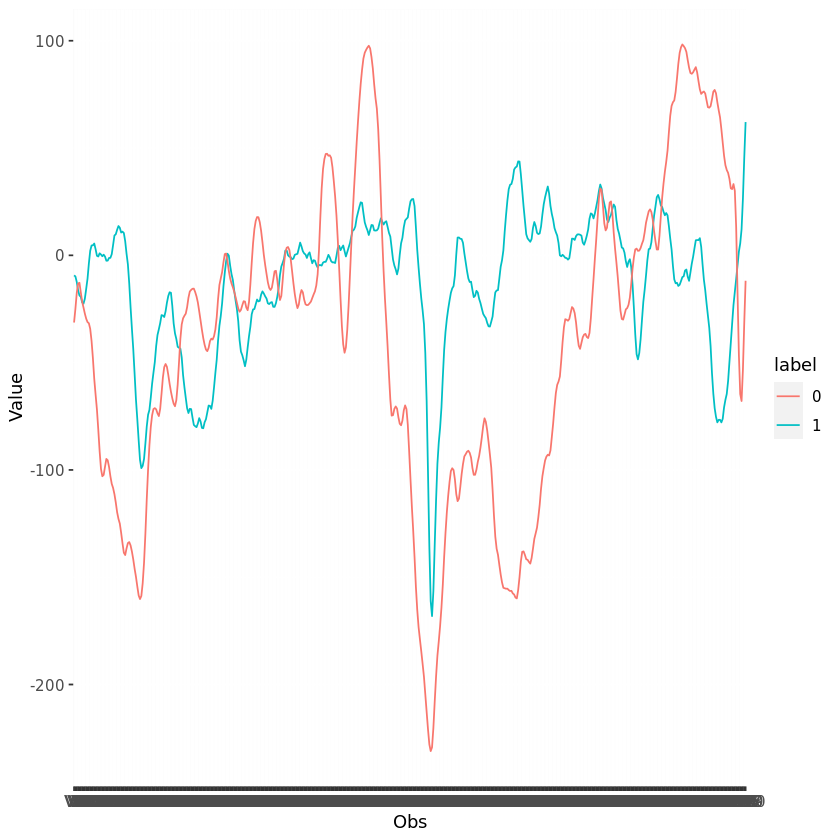

In [16]:

Selectedid = c("1","2")
PlotDT[Id %in%Selectedid & Channels=="1"& Segments=="1"] %>% 
   ggplot(aes(x = Obs, y = Value, group=Id)) +
   geom_line(aes(colour = `label`))

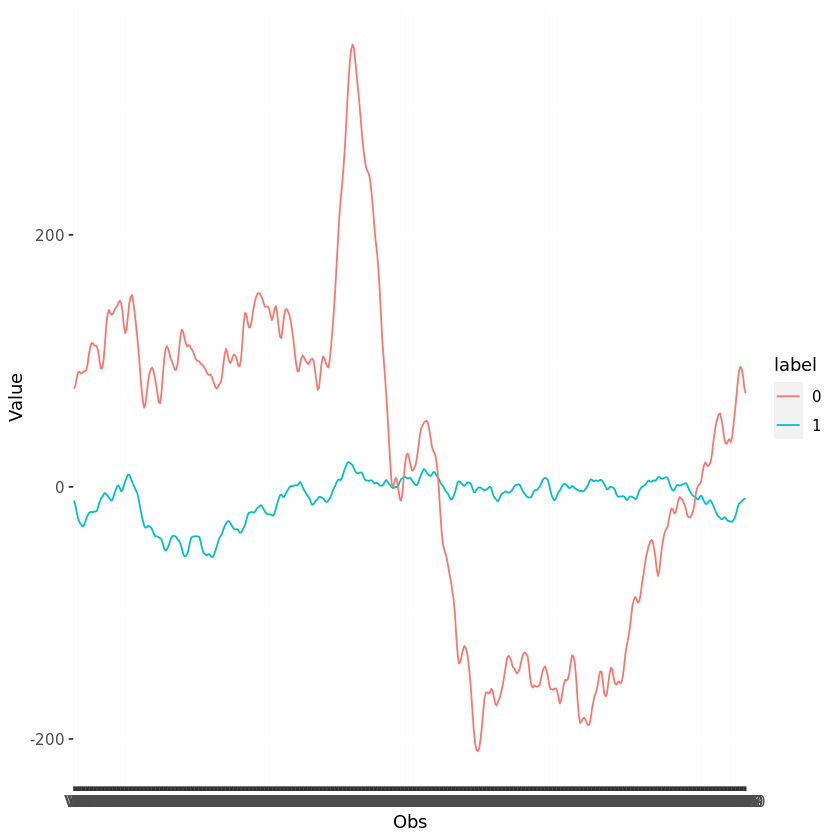

In [17]:
Selectedid = c("1","2")
PlotDT[Id %in%Selectedid & Channels=="2"& Segments=="1"] %>% 
   ggplot(aes(x = Obs, y = Value, group=Id)) +
   geom_line(aes(colour = `label`))

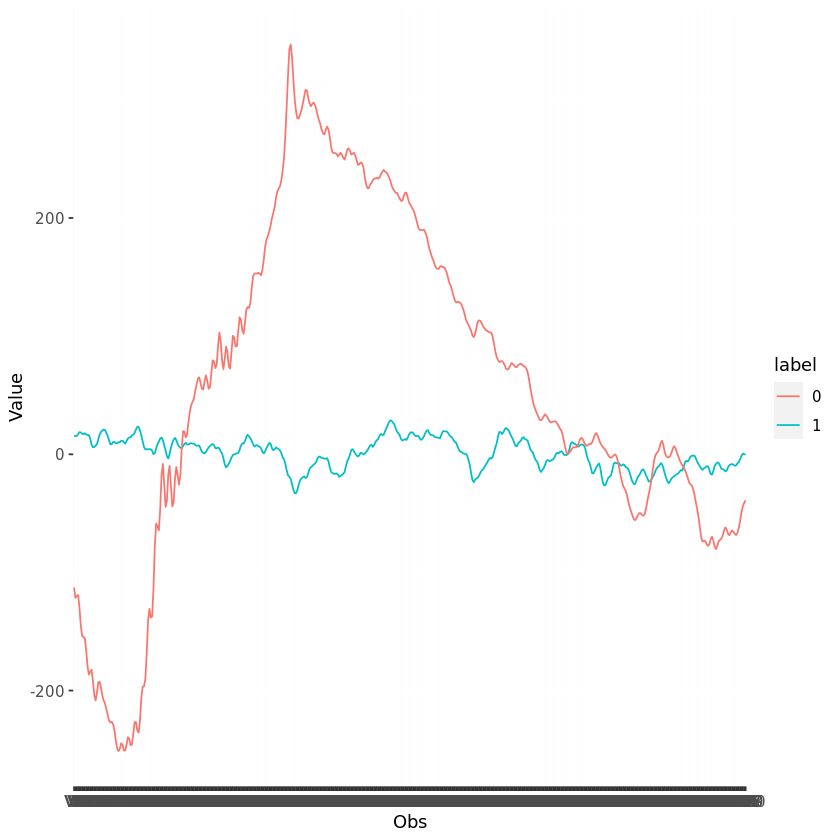

In [18]:
Selectedid = c("1","2")
PlotDT[Id %in%Selectedid & Channels=="1"& Segments=="2"] %>% 
   ggplot(aes(x = Obs, y = Value, group=Id)) +
   geom_line(aes(colour = `label`))


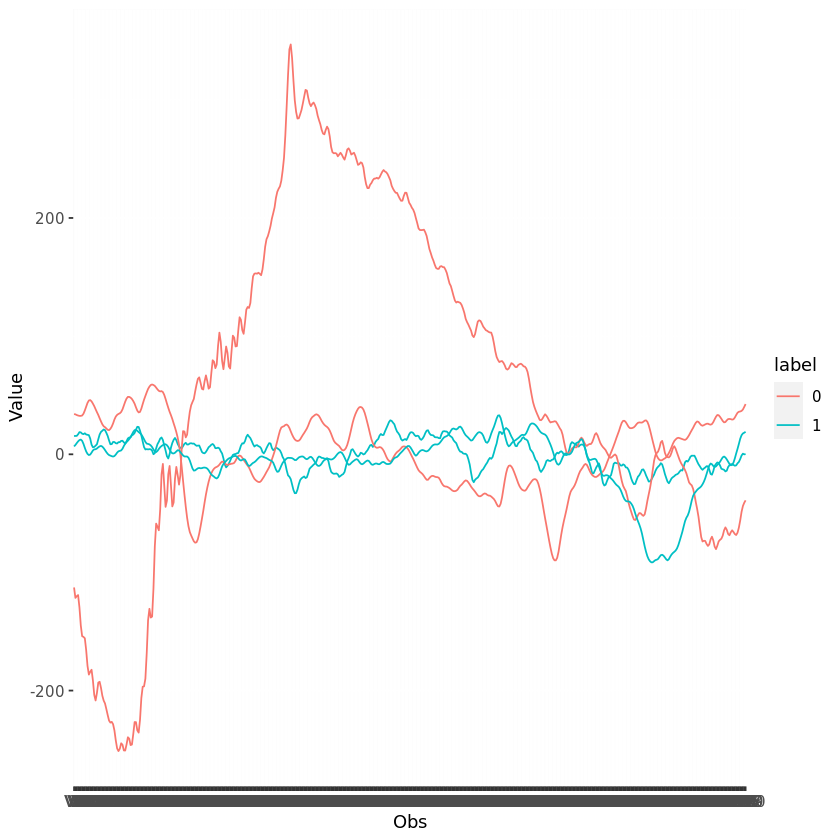

In [19]:
Selectedid = c("1","2","8","4")
PlotDT[Id %in%Selectedid & Channels=="1"& Segments=="2"] %>% 
   ggplot(aes(x = Obs, y = Value, group=Id)) +
   geom_line(aes(colour = `label`))


From these graphs, we can observe that women's eegs seem to follow a common pattern. This confers the relevance of constructing classification models. 


### 2.2 Dependant Variables Ys
In this problem, both classes are male (0) or female (1). When viewing the data,
we can distinguish between the number of appearances or observations of the two classes.


In [20]:
summary(Y_train[,-1])
prop.table(table(Y_train$label))

 label  
 0:737  
 1:209  


        0         1 
0.7790698 0.2209302 

Plot geo bar for gender


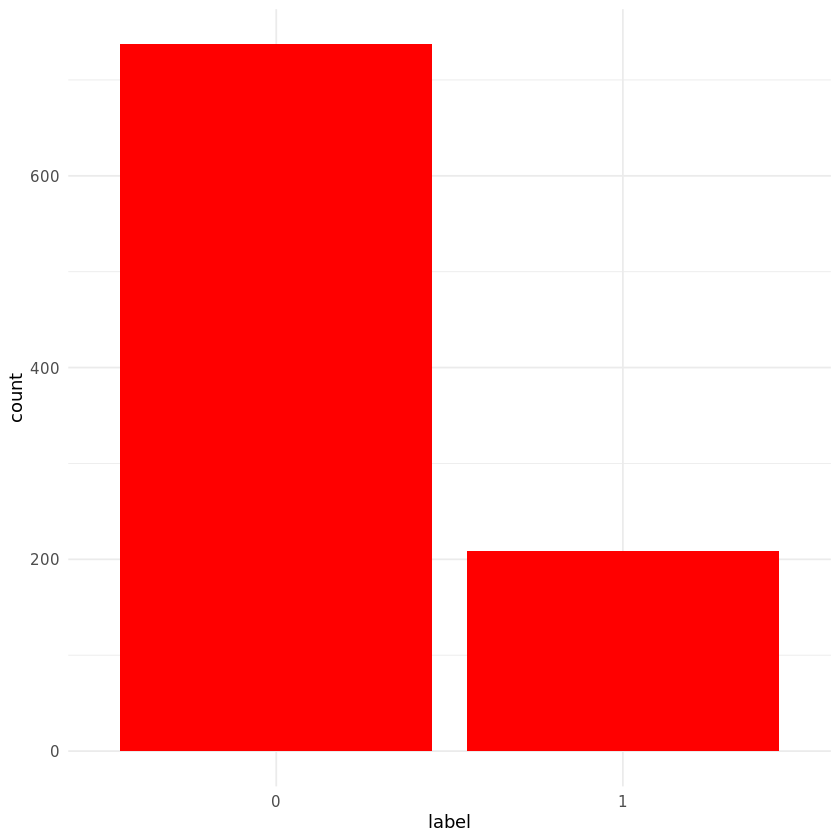

In [21]:
Y_train %>%
  ggplot(aes(label)) +
  geom_bar(fill = "red") +
  theme_minimal()


=> Imbalanced dataset, we will have to manage this issue. 


In [22]:
model_weights <- ifelse(Y_train$label == "0",
                        (1/table(Y_train$label)[1]) * 0.5,
                        (1/table(Y_train$label)[2]) * 0.5)

### 2.3 Manage outliers : apply fourier, module and scaling transformation

In order to have a better separation between signals, we transform our observation into frequency.   
This step is very common in signal processing analysis by using fast fourier transformation (fft) : https://towardsdatascience.com/fast-fourier-transform-937926e591cb  
In order to retreive real number, we applied modulus fonction for each complex number.  
We then scaled our observation with standardized normal.    
Those steps allowed us to manage outliers in our dataset. 

In [9]:
train_a<-copy(train)


In [10]:
train_fourier=train[, (Obs) := lapply(.SD, fft), .SDcols=Obs]
train_fourier[1,]


Id,Channels,Segments,V1,V2,V3,V4,V5,V6,V7,⋯,V492,V493,V494,V495,V496,V497,V498,V499,V500,label
<fct>,<fct>,<fct>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,⋯,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,<fct>
0,1,1,3851266+0i,3741852+0i,3616682+0i,3423113+0i,3103526+0i,2662547+0i,2184188+0i,⋯,-847079.7+0i,-1010903+0i,-1079154+0i,-1033392+0i,-854159.2+0i,-514342.8+0i,-87898.6+0i,310130.3+0i,609584.5+0i,0


In [11]:
train_module <-train_fourier[, (Obs) := lapply(.SD, Mod), .SDcols=Obs]
train_module[1,]

train_module_scaled=train_module[, (Obs) := lapply(.SD, scale), .SDcols=Obs]

Id,Channels,Segments,V1,V2,V3,V4,V5,V6,V7,⋯,V492,V493,V494,V495,V496,V497,V498,V499,V500,label
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1,1,3851266,3741852,3616682,3423113,3103526,2662547,2184188,⋯,847079.7,1010903,1079154,1033392,854159.2,514342.8,87898.6,310130.3,609584.5,0


In [ ]:
PlotDT = data.table::melt(train_module_scaled, id.vars = c(1,2,3,504), 
          measure.vars = Obs, 
          variable.name = "Obs",
          value.name = "Value")

In [ ]:
s_id=1
PlotDT[Channels=="1"& Segments=="1" & Id %in% s_id] %>% 
   ggplot(aes(x = Obs, y = Value, group=Id)) +
   geom_line(aes(colour = `label`))

In [ ]:

PlotDT[Channels=="1"& Segments=="1"] %>%
  ggplot(aes(x=Value)) +
  geom_density(fill = "red", bins = 1) +
  theme_minimal()

We export results and upload it to the cloud

In [ ]:
fwrite(train_module_scaled,"train_module_scaled.csv")